In [93]:
import sys
sys.path.append("../")
import pandas as pd
from utils.data_utils import DataLoader
from utils.feature_association import FeatureAssociation
from utils.encoding import Encoder
from utils import visualization

from importlib import reload
reload(visualization)

<module 'utils.visualization' from '/home/azeem/Documents/ML-I/ML1-XAI/Project/notebooks/../utils/visualization.py'>

In [58]:
data_loader = DataLoader(file_path='../data/raw/car.data' , target_column='class', test_size=0.2, random_state=42)

In [59]:
X, y = data_loader.get_data()

In [60]:
df = data_loader.get_df()

In [61]:
df.shape

(1728, 7)

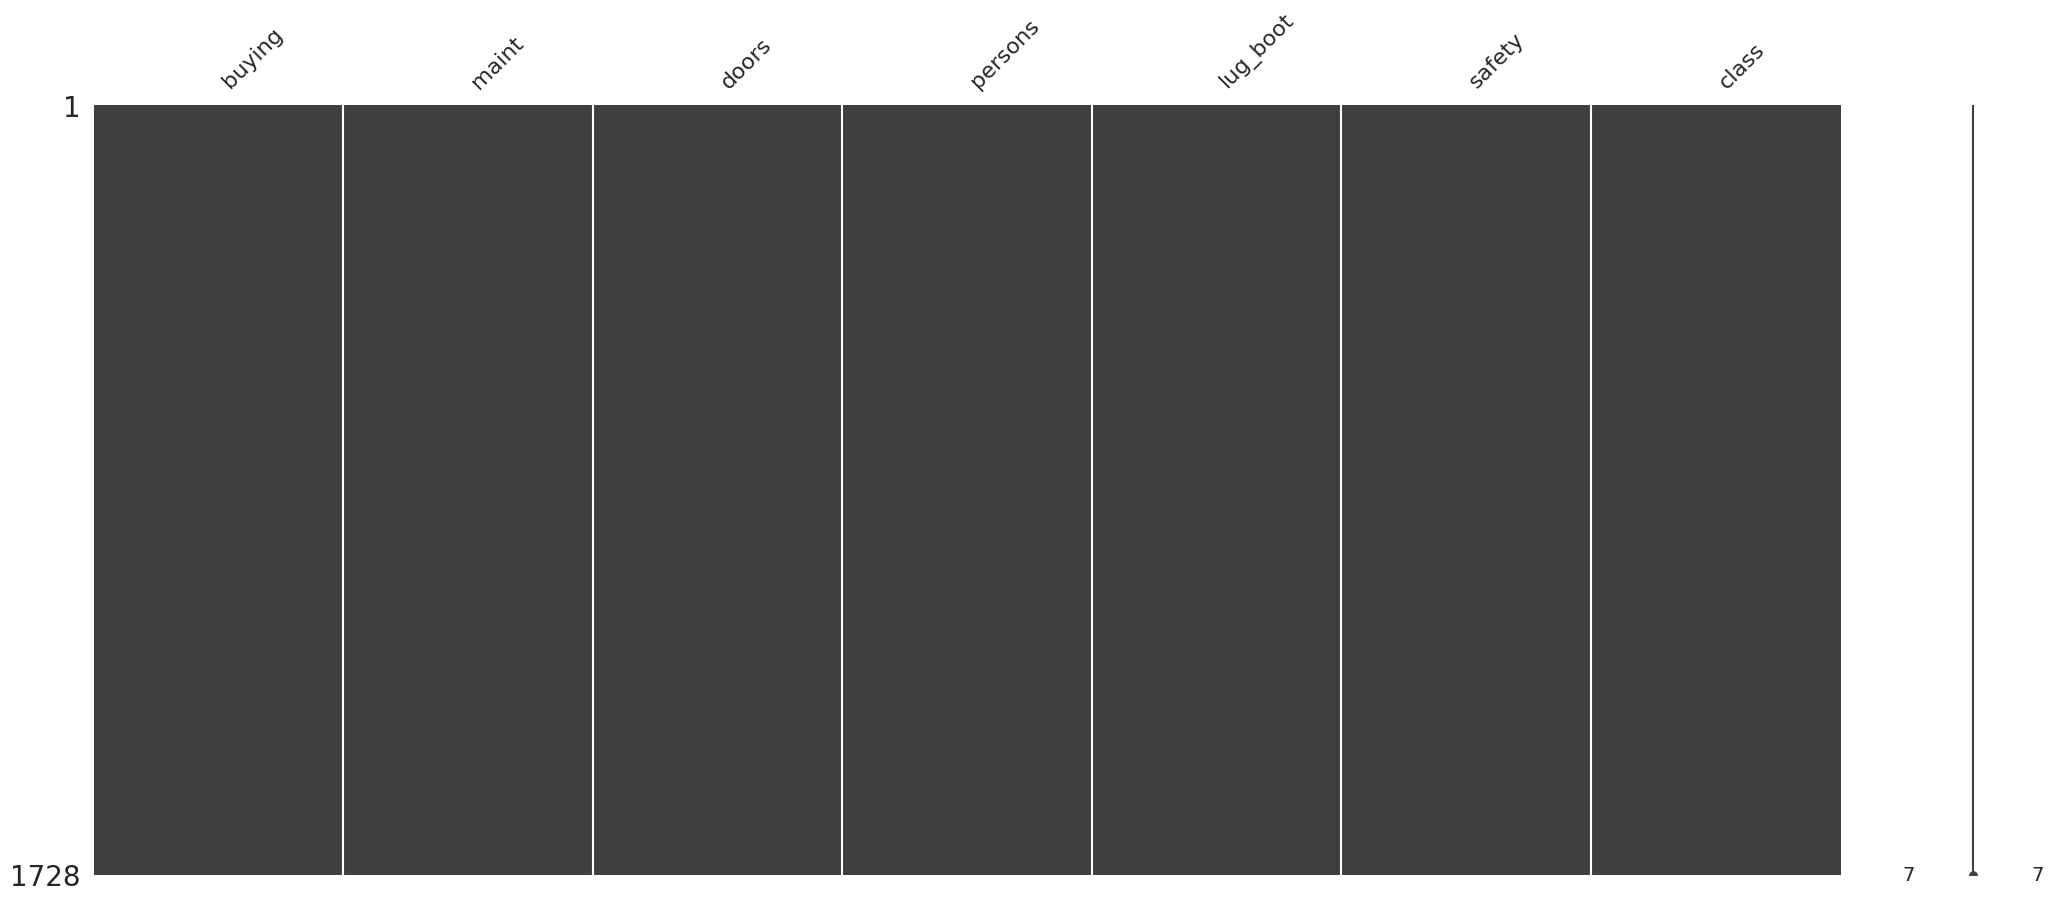

In [62]:
visualization.plot_missing(df)

In [63]:
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [65]:
for col in df.columns:
    print(col, df[col].unique())
    print('-'*30)
    print(df[col].value_counts())
    print("="*30 + '\n')

buying ['vhigh' 'high' 'med' 'low']
------------------------------
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint ['vhigh' 'high' 'med' 'low']
------------------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors ['2' '3' '4' '5more']
------------------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons ['2' '4' 'more']
------------------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot ['small' 'med' 'big']
------------------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety ['low' 'med' 'high']
------------------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64

class ['unacc' 'acc' 'vgood' 'good']
------------------------------
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [66]:
c = df['class'].value_counts()
p = df['class'].value_counts(normalize=True).mul(100).round(2)

pd.concat([c, p], axis = 1, keys=['count', '%'])

count      %
class              
unacc   1210  70.02
acc      384  22.22
good      69   3.99
vgood     65   3.76

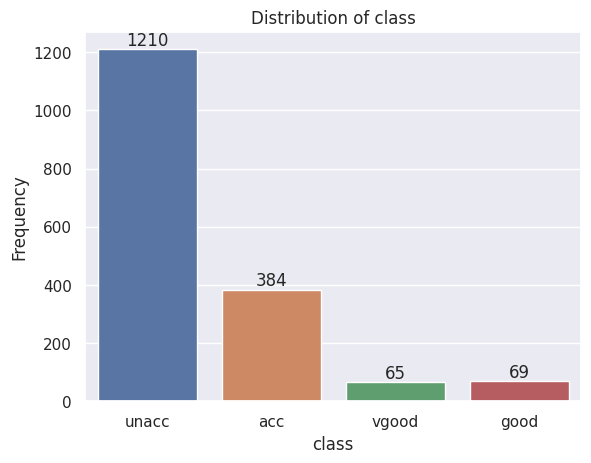

In [67]:
visualization.plot_count(df, col='class')

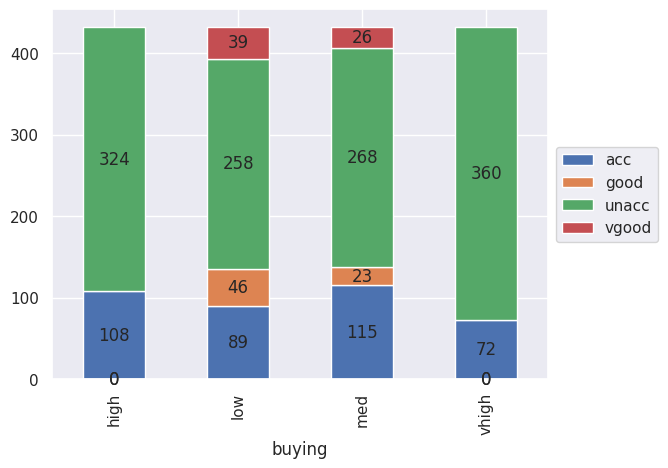

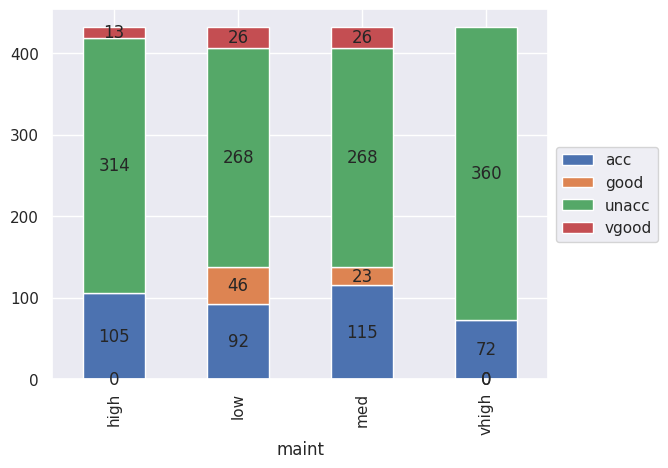

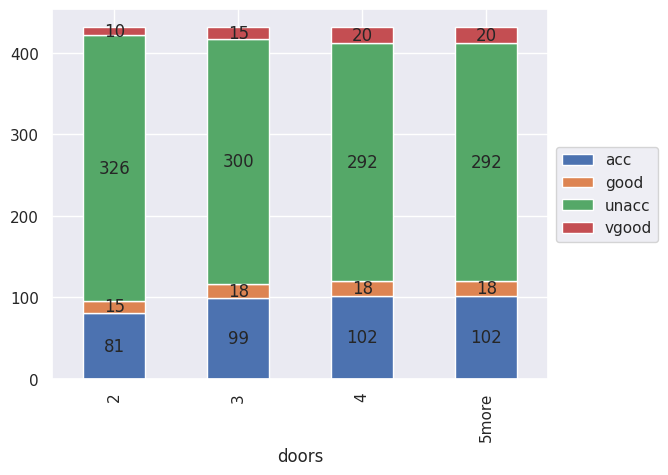

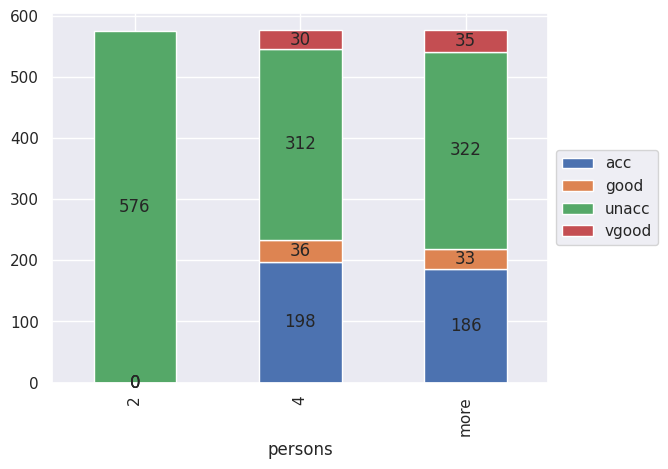

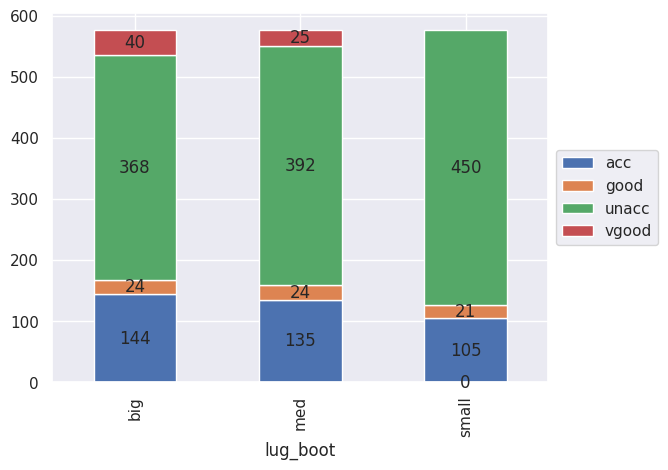

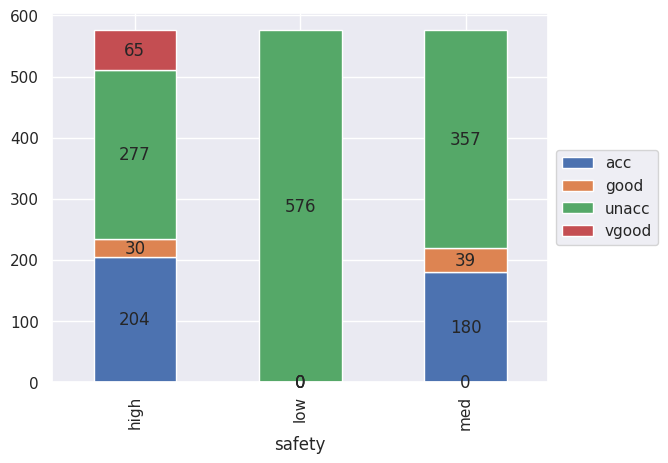

In [68]:
for col in df.columns[:-1]:
    visualization.crosstab_plot(df, col, 'class')

In [76]:
FeatureAssociation(df).get_df(significant=True)

Significant Associations


Feature 1 Feature 2 p-value
0    buying     class  0.0000
1     maint     class  0.0000
2   persons     class  0.0000
3  lug_boot     class  0.0000
4    safety     class  0.0000

In [77]:
FeatureAssociation(df).get_df(significant=False)

Not Significant Associations


Feature 1 Feature 2   p-value
0     buying     maint  1.000000
1     buying     doors  1.000000
2     buying   persons  1.000000
3     buying  lug_boot  1.000000
4     buying    safety  1.000000
5      maint     doors  1.000000
6      maint   persons  1.000000
7      maint  lug_boot  1.000000
8      maint    safety  1.000000
9      doors   persons  1.000000
10     doors  lug_boot  1.000000
11     doors    safety  1.000000
12     doors     class  0.320242
13   persons  lug_boot  1.000000
14   persons    safety  1.000000
15  lug_boot    safety  1.000000

In [104]:
Encoder(X, order_list=order_list).get_data()

buying  maint  doors  persons  lug_boot  safety
0        3.0    3.0    0.0      0.0       0.0     0.0
1        3.0    3.0    0.0      0.0       0.0     1.0
2        3.0    3.0    0.0      0.0       0.0     2.0
3        3.0    3.0    0.0      0.0       1.0     0.0
4        3.0    3.0    0.0      0.0       1.0     1.0
...      ...    ...    ...      ...       ...     ...
1723     0.0    0.0    3.0      2.0       1.0     1.0
1724     0.0    0.0    3.0      2.0       1.0     2.0
1725     0.0    0.0    3.0      2.0       2.0     0.0
1726     0.0    0.0    3.0      2.0       2.0     1.0
1727     0.0    0.0    3.0      2.0       2.0     2.0

[1728 rows x 6 columns]